## Libraries

This data set contains a data collected from 569 patients for two breast tumors - one cancerous and second non-cancerous

In [1]:
# resource: https://data.world/health/breast-cancer-wisconsin

Now all packages for analysis can be downloaded and the DataFrame can be definied

In [2]:
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics

## Data

In [3]:
filename = ('breast-cancer-wisconsin-data.csv')

In [4]:
df = pd.read_csv(filename)

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


***

#### Observation:
The DataFrame contains 32 columns and 569 rows and includes ID numbers for each of 569 patients, their diagnosis (either M - malignant or B - benign) and their 30 real-valued input features

***

## Overview and background of the DataFrame

### Summary of The DataFrame

##### Title:

Wisconsin Diagnostic Breast Cancer (WDBC)


##### Creators:

1. Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu 


##### Donor:

Nick Street


##### Date:

November 1995


##### Source:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


### DataFrame Description and Relevant Information

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

Number of instances: **569** 

Number of attributes: **32** (ID, diagnosis, 30 real-valued input features)

<u>*Attribute information:*</u>

**1.** ID number

**2.** Diagnosis (M = malignant, B = benign)

<u>*Ten real-valued features are computed for each cell nucleus:*</u>

**a)** radius (mean of distances from center to points on the perimeter)

**b)** texture (standard deviation of gray-scale values)

**c)** perimeter

**d)** area

**e)** smoothness (local variation in radius lengths)

**f)** compactness (perimeter^2 / area - 1.0)

**g)** concavity (severity of concave portions of the contour)

**h)** concave points (number of concave portions of the contour)

**i)** symmetry 

**j)** fractal dimension ("coastline approximation" - 1)

The **mean**, **standard error**, and **"worst"** or **largest** (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with **four** significant digits.

Missing attribute values: **none**

Class distribution: **357 benign, 212 malignant**

## Statistical Analysis of the DataFrame

### DataFrame checks

First step is to check if the DataFrame has any missing values 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

***

#### Observation:
The DataFrame doesn't have any missing values

***

List of columns in the DataSet

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

***

#### Observation:
'id' column is a numeric column, but doesn't help in this analysis, so should be excluded

***

In [8]:
df.drop(['id'], axis = 1, inplace = True)

Let's replace non-numerical strings in 'diagnosis' column with numerical for easier analysis: **'M'** replace with **'1'** for malignant and **'B'** replace with **'0'** for benign

In [9]:
# resource: https://sparkbyexamples.com/pandas/pandas-replace-substring-in-dataframe/

df['diagnosis'] = df['diagnosis'].replace(['M','B'],[1,0])

The updated DataFrame

In [10]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Summary of the numerical data in the DataFrame

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [12]:
summary = df.describe
print (summary())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

***

#### Observations:
- all statistics are calculated for 569 items
- all statistics are **the highest** in area_worst 
- all statistics, except 25%, are **the lowest** in fractal_dimension_se

***

Let's check how the diagnosis is split by malignant (1) and benign (0) tumors

In [13]:
df.groupby(['diagnosis']).diagnosis.count()

diagnosis
0    357
1    212
Name: diagnosis, dtype: int64

Pie chart of the diagnosis

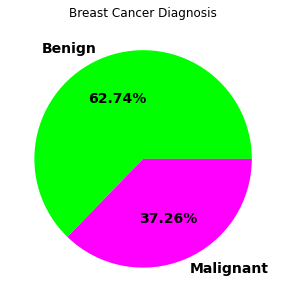

In [14]:
# resource: https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm
# resource: https://medium.com/geekculture/create-a-pie-chart-in-python-using-only-one-line-of-code-57bd974d8432
# resource: https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python

plt.figure(figsize=(5,5))

mylabels = ['Benign', 'Malignant']
mycolors = ['Lime', 'Fuchsia']
plt.title('Breast Cancer Diagnosis')

y = df['diagnosis'].value_counts()
plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.2f%%', textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

***

#### Observations:
- From **569** patients **357** have **benign tumor** and **212** have **malignant tumor**
- This means that **more patients** have **noncancers tumor**

***

### DataFrame visualisation

Let's check correlation in the DatafRame

In [15]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Viualisation of correlation

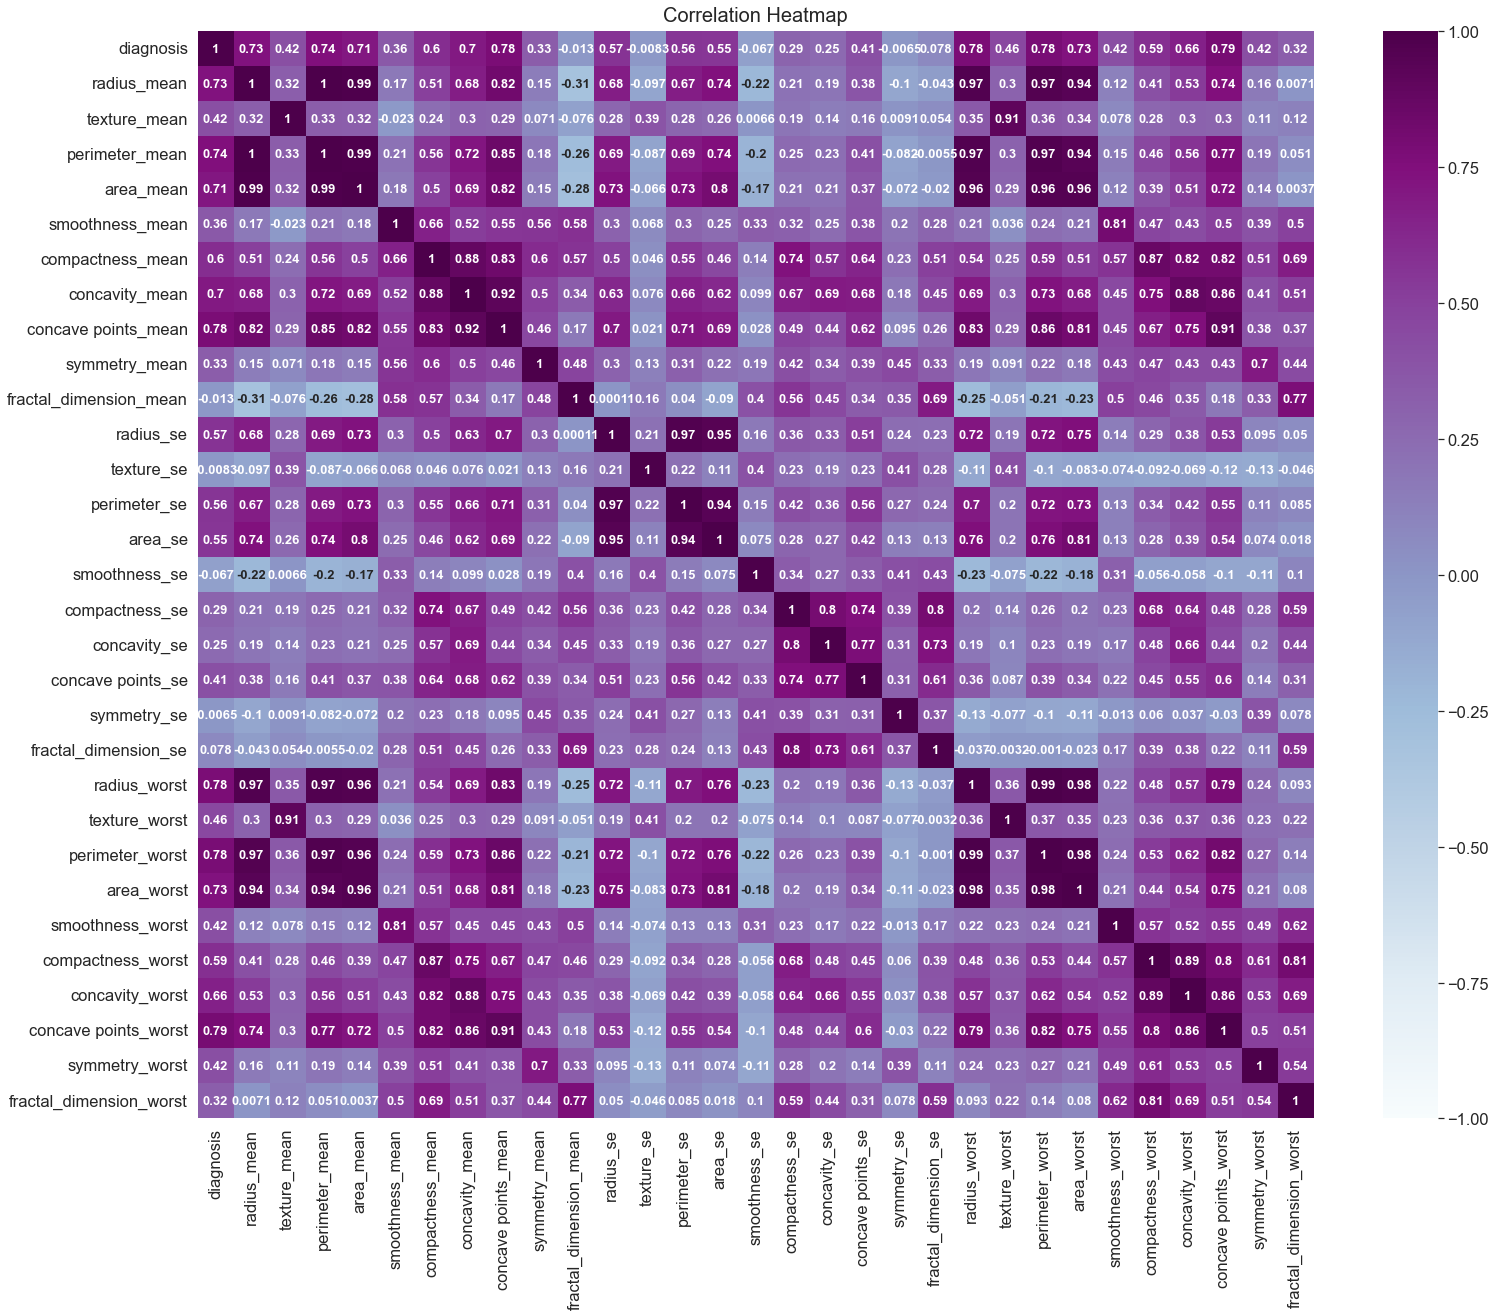

In [16]:
# resource: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps
# resource: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# resource: https://discuss.streamlit.io/t/change-the-font-size-of-labels-in-sns-heatmap/35454/2

ax = plt.figure(figsize=(25, 20))
sns.set(font_scale=1.5)
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BuPu', annot=True, annot_kws={'fontsize':13, 'fontweight': 'bold'})
ax.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=10)
plt.show()

Let's sort correlation values in 'diagnosis'

In [17]:
# resource: https://stackoverflow.com/questions/35420642/how-to-plot-a-graph-for-correlation-co-efficient-between-each-attributes-of-a-da

df_corr = df.corr()[['diagnosis']].sort_values(by='diagnosis')
df_corr

,diagnosis
smoothness_se,-0.067016
fractal_dimension_mean,-0.012838
texture_se,-0.008303
symmetry_se,-0.006522
fractal_dimension_se,0.077972
concavity_se,0.253730
compactness_se,0.292999
fractal_dimension_worst,0.323872
symmetry_mean,0.330499
smoothness_mean,0.358560


Let's show the above in the barplot

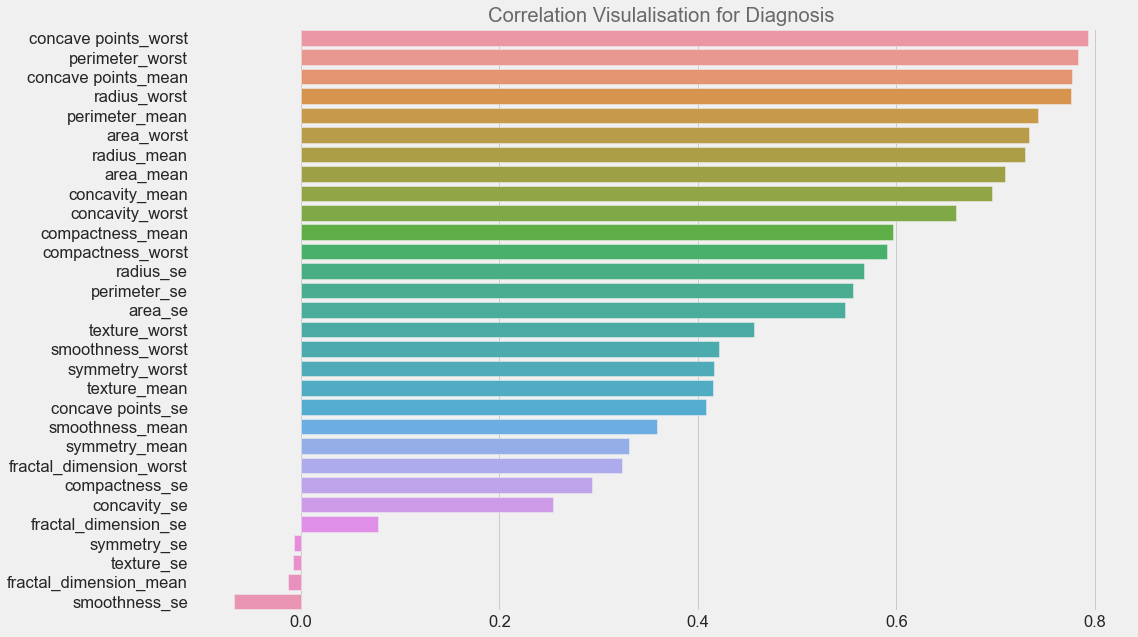

In [18]:
# resource: https://www.kaggle.com/code/swagata14das/breast-cancer-prediction

plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))
data = df.corr()["diagnosis"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
    
sns.set_color_codes('muted')

sns.barplot(x=corr, y=labels, orient ='h')
plt.title('Correlation Visulalisation for Diagnosis', color='dimgrey')
plt.show()

***

#### Observation:
**Strong** correlations with 'diagnosis' occur in 'concave points-worst','perimeter_worst','radius_worst' and 'concave points-mean'

***

Splitting the DataFrame into 3 groups according to their column names **('mean', 'se' and 'worst')** 

In [19]:
df_mean = df.loc[:, df.columns.str.contains('_mean')]
df_se = df.loc[:, df.columns.str.contains('_se')]
df_worst = df.loc[:, df.columns.str.contains('_worst')]

Statistics of the **'Mean'** (or df_mean) group

In [20]:
df_mean.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


Visualisation of the **'Mean'** (or df_mean) group with seaborn histograms

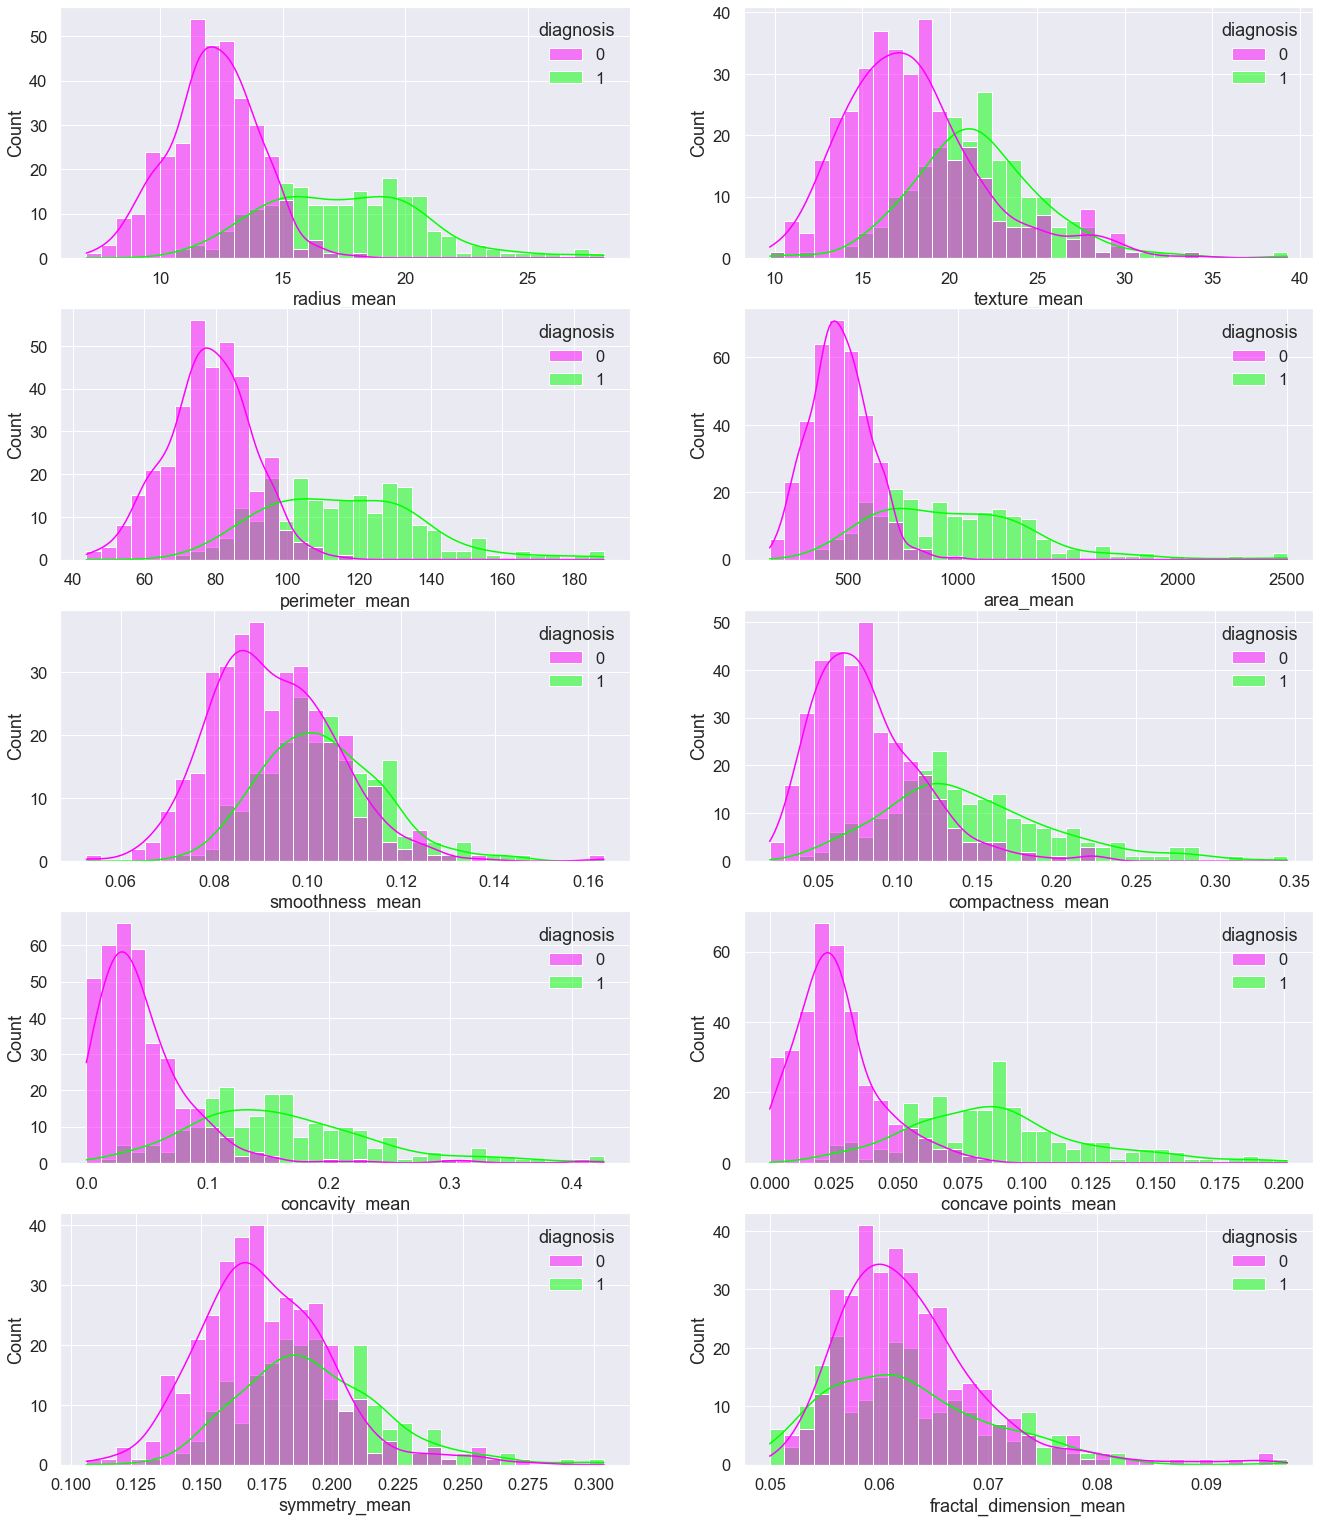

In [21]:
# Apply plot style
plt.style.use('seaborn')
palette = ['fuchsia', 'lime']
sns.set(font_scale = 1.5)

fig,ax = plt.subplots(5, 2, figsize=(20,25))

plt.subplot(5,2,1)
ax = sns.histplot(df, x = df['radius_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,2)
ax = sns.histplot(df, x = df['texture_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,3)
ax = sns.histplot(df, x = df['perimeter_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,4)
ax = sns.histplot(df, x = df['area_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,5)
ax = sns.histplot(df, x = df['smoothness_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,6)
ax = sns.histplot(df, x = df['compactness_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,7)
ax = sns.histplot(df, x = df['concavity_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,8)
ax = sns.histplot(df, x = df['concave points_mean'] , hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,9)
ax = sns.histplot(df, x = df['symmetry_mean'] , hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,10)
ax = sns.histplot(df, x = df['fractal_dimension_mean'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.show()

Statistics of the **'Standard Error'** (or df_se) group

In [22]:
df_se.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
perimeter_se,569.0,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.98000
area_se,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113
compactness_se,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540
concavity_se,569.0,0.031894,0.030186,0.000000,0.015090,0.025890,0.042050,0.39600
concave points_se,569.0,0.011796,0.006170,0.000000,0.007638,0.010930,0.014710,0.05279
symmetry_se,569.0,0.020542,0.008266,0.007882,0.015160,0.018730,0.023480,0.07895
fractal_dimension_se,569.0,0.003795,0.002646,0.000895,0.002248,0.003187,0.004558,0.02984


Visualisation of the **'Standard Error'** (or df_se) group with seaborn histograms

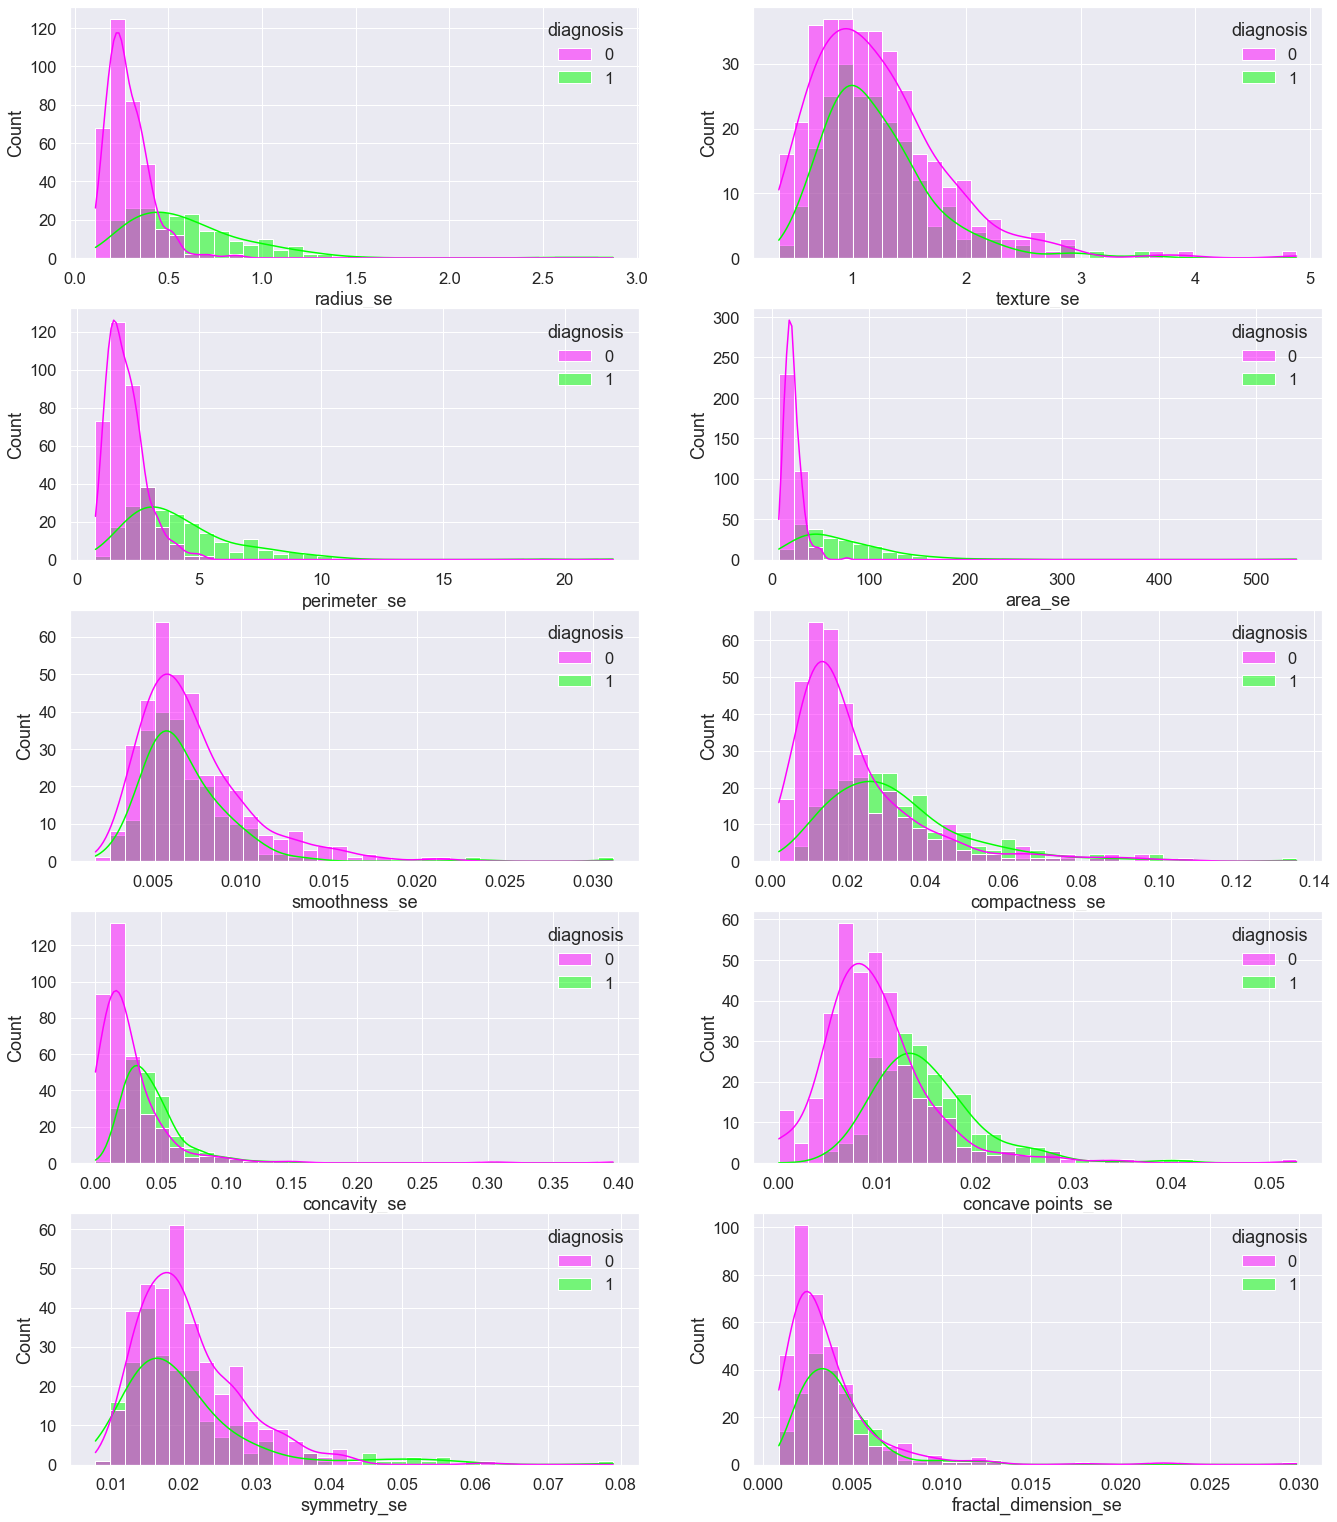

In [23]:
# Apply plot style
plt.style.use('seaborn')
palette = ['fuchsia', 'lime']
sns.set(font_scale = 1.5)

fig,ax = plt.subplots(5, 2, figsize=(20,25))

plt.subplot(5,2,1)
ax = sns.histplot(df, x = df['radius_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,2)
ax = sns.histplot(df, x = df['texture_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,3)
ax = sns.histplot(df, x = df['perimeter_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,4)
ax = sns.histplot(df, x = df['area_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,5)
ax = sns.histplot(df, x = df['smoothness_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,6)
ax = sns.histplot(df, x = df['compactness_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,7)
ax = sns.histplot(df, x = df['concavity_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,8)
ax = sns.histplot(df, x = df['concave points_se'] , hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,9)
ax = sns.histplot(df, x = df['symmetry_se'] , hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,10)
ax = sns.histplot(df, x = df['fractal_dimension_se'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.show()

Statistics of the **'Worst - mean of the three largest values'** (or df_worst) group

In [24]:
df_worst.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_worst,569.0,16.269190,4.833242,7.93000,13.01000,14.97000,18.79000,36.0400
texture_worst,569.0,25.677223,6.146258,12.02000,21.08000,25.41000,29.72000,49.5400
perimeter_worst,569.0,107.261213,33.602542,50.41000,84.11000,97.66000,125.40000,251.2000
area_worst,569.0,880.583128,569.356993,185.20000,515.30000,686.50000,1084.00000,4254.0000
smoothness_worst,569.0,0.132369,0.022832,0.07117,0.11660,0.13130,0.14600,0.2226
compactness_worst,569.0,0.254265,0.157336,0.02729,0.14720,0.21190,0.33910,1.0580
concavity_worst,569.0,0.272188,0.208624,0.00000,0.11450,0.22670,0.38290,1.2520
concave points_worst,569.0,0.114606,0.065732,0.00000,0.06493,0.09993,0.16140,0.2910
symmetry_worst,569.0,0.290076,0.061867,0.15650,0.25040,0.28220,0.31790,0.6638
fractal_dimension_worst,569.0,0.083946,0.018061,0.05504,0.07146,0.08004,0.09208,0.2075


Visualisation of the **'Worst - mean of the three largest values'** (or df_worst) group with seaborn histograms

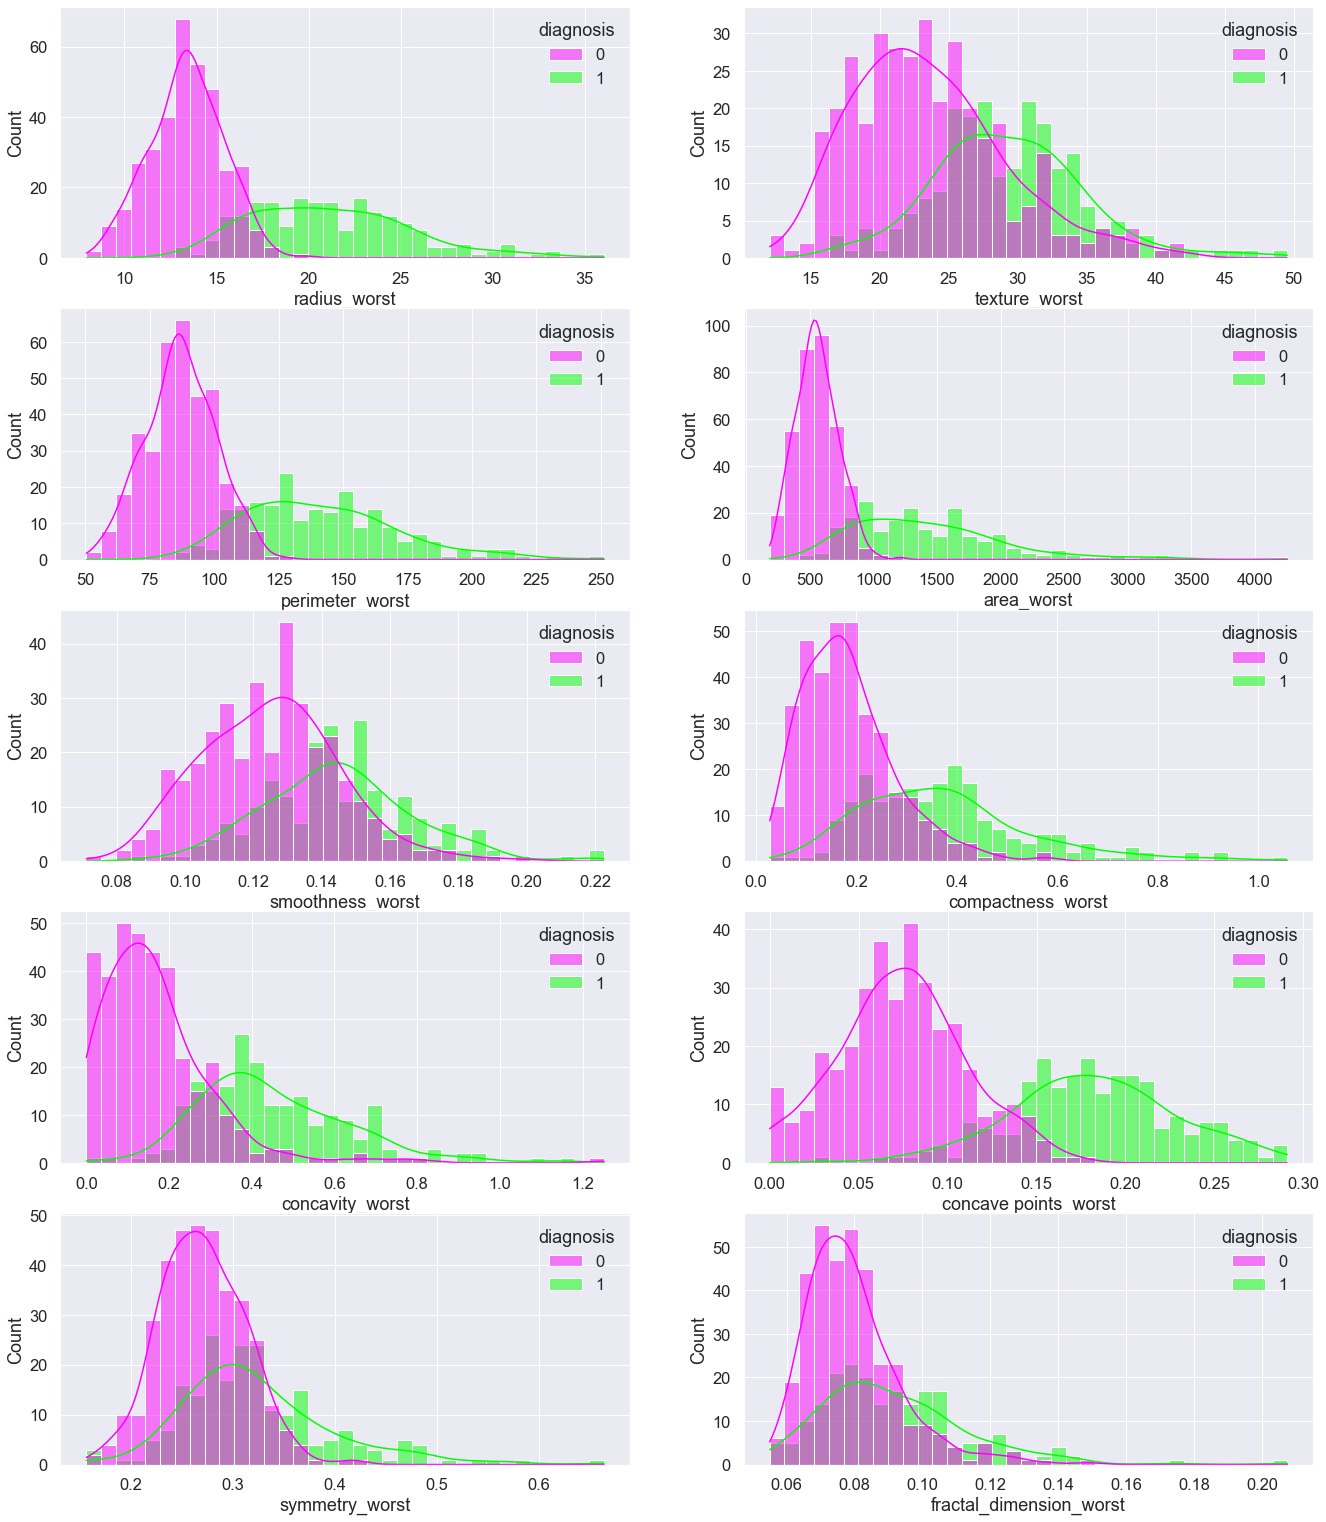

In [25]:
# Apply plot style
plt.style.use('seaborn')
palette = ['fuchsia', 'lime']
sns.set(font_scale = 1.5)

fig,ax = plt.subplots(5, 2, figsize=(20,25))

plt.subplot(5,2,1)
ax = sns.histplot(df, x = df['radius_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,2)
ax = sns.histplot(df, x = df['texture_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,3)
ax = sns.histplot(df, x = df['perimeter_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,4)
ax = sns.histplot(df, x = df['area_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,5)
ax = sns.histplot(df, x = df['smoothness_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,6)
ax = sns.histplot(df, x = df['compactness_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,7)
ax = sns.histplot(df, x = df['concavity_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,8)
ax = sns.histplot(df, x = df['concave points_worst'] , hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,9)
ax = sns.histplot(df, x = df['symmetry_worst'] , hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.subplot(5,2,10)
ax = sns.histplot(df, x = df['fractal_dimension_worst'], hue ='diagnosis', palette = palette, bins = 35, kde = True)

plt.show()

***

#### Observations:
- There is **no prefect** separation between Benign and Malignant tumors in any of the distributions from the three groups above
- There is some good separations in **'Mean' group:** 'perimeter_mean', 'area_mean', 'concave points_mean' and 'concavity_mean'
- Similary there is some good separations in **'Worst' group:** 'perimeter_worst', 'area_worst', 'concave points_worst' and 'concavity_worst'
- In **'Standard Error'** group all distrtibutions are quite tight

***

## Machine Learning

Checking and preparing data before applying Machine Learning Models

In [26]:
# resource: https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe

dict(df.dtypes)

{'diagnosis': dtype('int64'),
 'radius_mean': dtype('float64'),
 'texture_mean': dtype('float64'),
 'perimeter_mean': dtype('float64'),
 'area_mean': dtype('float64'),
 'smoothness_mean': dtype('float64'),
 'compactness_mean': dtype('float64'),
 'concavity_mean': dtype('float64'),
 'concave points_mean': dtype('float64'),
 'symmetry_mean': dtype('float64'),
 'fractal_dimension_mean': dtype('float64'),
 'radius_se': dtype('float64'),
 'texture_se': dtype('float64'),
 'perimeter_se': dtype('float64'),
 'area_se': dtype('float64'),
 'smoothness_se': dtype('float64'),
 'compactness_se': dtype('float64'),
 'concavity_se': dtype('float64'),
 'concave points_se': dtype('float64'),
 'symmetry_se': dtype('float64'),
 'fractal_dimension_se': dtype('float64'),
 'radius_worst': dtype('float64'),
 'texture_worst': dtype('float64'),
 'perimeter_worst': dtype('float64'),
 'area_worst': dtype('float64'),
 'smoothness_worst': dtype('float64'),
 'compactness_worst': dtype('float64'),
 'concavity_worst':

In [27]:
# resource: https://www.ritchieng.com/pandas-changing-datatype/

df['diagnosis'] = df.diagnosis.astype(float)

In [28]:
df.dtypes

diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Applying different colors to text for better results reading

In [29]:
# resource: https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Creating training - splitting DataFrame into **training 80%** and **testing 20%**

In [30]:
# resource: https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples

x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, train_size=0.8, random_state=1)
x_train.shape, y_train.shape

((455, 30), (455,))

Checking **5 different models** for breast cancer prediction:
- 1st - LogisticRegression
- 2nd - LinearRegression
- 3rd - RandomForestClassifier
- 4th - GaussianNB
- 5th - KNeighborsClassifier

In [31]:
# resource: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

**<u>Creating 1st Model - LogisticRegression</u>**


After checking different parameters for penalty ('liblinear', 'newton-cg', 'sag' & 'saga'), it seems that 'newton-cg' gives the highest score of the model, thus this will be used in the prediction

In [32]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# resource: https://stackoverflow.com/questions/68799909/classification-accuracy-with-sklearn-in-percentage

Model1 = LogisticRegression(solver ='newton-cg').fit(x_train,y_train)
print(f'Model score of LogisticRegression is:\n')
print(color.BOLD + f'{Model1.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of LogisticRegression is:

96.26%


<u>Predicting results with LogisticRegression Model</u>

In [33]:
Prediction1 = Model1.predict(x_test)

<u>Actual breast cancer when using LogisticRegression Model</u>

In [34]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

<u>Predicted breast cancer when using LogisticRegression Model</u>

In [35]:
Prediction1

array([1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

<u>Accuracy score of LogisticRegression Model</u>

In [36]:
print(f'Accuracy score of LogisticRegression Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction1,y_test)*100:.2f}%'+ color.END)

Accuracy score of LogisticRegression Model is:

94.74%


<u>Confusion Matrix for LogisticRegression Model</u>

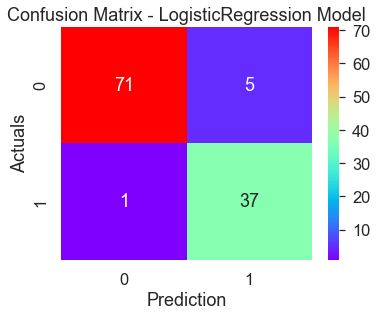

In [37]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Prediction1,y_test),annot=True, cmap='rainbow')
plt.title('Confusion Matrix - LogisticRegression Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

<u>Classification Report for LogisticRegression Model</u>

In [38]:
print(color.BOLD +'Classification Report for LogisticRegression Model:\n\n'
      + color.END, classification_report(Prediction1,y_test))

Classification Report for LogisticRegression Model:

               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        76
         1.0       0.88      0.97      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



**<u>Creating 2nd Model - LinearRegression</u>**

In [39]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Model2 = LinearRegression().fit(x_train,y_train)
print(f'Model score of LinearRegression is:\n')
print(color.BOLD + f'{Model2.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of LinearRegression is:

78.04%


<u>Predicting results with LinearRegression Model</u>

In [40]:
Prediction2 = Model2.predict(x_test)

# When model is run, it gives figures in continous form, so they need to be rounded to zero decimal places

# resource: https://careerkarma.com/blog/python-round/

Prediction2 = Prediction2.round().astype(int)

<u>Actual breast cancer when using LinearRegression Model</u>

In [41]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

<u>Predicted breast cancer when using LinearRegression Model</u>

In [42]:
Prediction2

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

<u>Accuracy score of LinearRegression Model</u>

In [43]:
print(f'Accuracy score of LinearRegression Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction2,y_test)*100:.2f}%'+ color.END)

Accuracy score of LinearRegression Model is:

94.74%


<u>Confusion Matrix for LinearRegression Model</u>

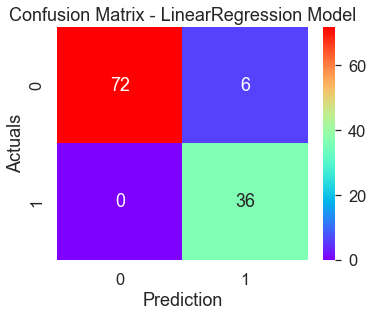

In [44]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Prediction2,y_test), annot=True, cmap='rainbow')
plt.title('Confusion Matrix - LinearRegression Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

<u>Classification Report for LinearRegression Model</u>

In [45]:
print(color.BOLD +'Classification Report for LinearRegression Model:\n\n'
      + color.END, classification_report(Prediction2,y_test))

Classification Report for LinearRegression Model:

               precision    recall  f1-score   support

           0       1.00      0.92      0.96        78
           1       0.86      1.00      0.92        36

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



**<u>Creating 3rd Model - RandomForestClassifier</u>**

In [46]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Model3 = RandomForestClassifier().fit(x_train,y_train)
print(f'Model score of RandomForestClassifier is:\n')
print(color.BOLD + f'{Model3.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of RandomForestClassifier is:

100.00%


<u>Predicting results with RandomForestClassifier Model</u>

In [47]:
Prediction3 = Model3.predict(x_test)

<u>Actual breast cancer when using RandomForestClassifier Model</u>

In [48]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

<u>Predicted breast cancer when using RandomForestClassifier Model</u>

In [49]:
Prediction3

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

<u>Accuracy score of RandomForestClassifier Model</u>

In [50]:
print(f'Accuracy score of RandomForestClassifier Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction3,y_test)*100:.2f}%'+ color.END)

Accuracy score of RandomForestClassifier Model is:

94.74%


<u>Confusion Matrix for RandomForestClassifier Model</u>

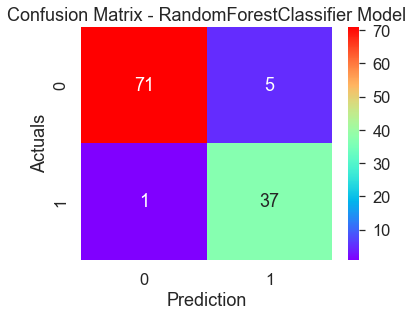

In [51]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Prediction3,y_test), annot=True, cmap='rainbow')
plt.title('Confusion Matrix - RandomForestClassifier Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

<u>Classification Report for RandomForestClassifier Model</u>

In [52]:
print(color.BOLD +'Classification Report for RandomForestClassifier Model:\n\n'
      + color.END, classification_report(Prediction3,y_test))

Classification Report for RandomForestClassifier Model:

               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        76
         1.0       0.88      0.97      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



**<u>Creating 4th Model - GaussianNB</u>**

In [53]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Model4 = GaussianNB().fit(x_train,y_train)
print(f'Model score of GaussianNB is:\n')
print(color.BOLD + f'{Model4.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of GaussianNB is:

94.07%


<u>Predicting results with GaussianNB Model</u>

In [54]:
Prediction4 = Model4.predict(x_test)

<u>Actual breast cancer when using GaussianNB Model</u>

In [55]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

<u>Predicted breast cancer when using GaussianNB Model</u>

In [56]:
Prediction4

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.])

<u>Accuracy score of GaussianNB Model</u>

In [57]:
print(f'Accuracy score of GaussianNB Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction4,y_test)*100:.2f}%'+ color.END)

Accuracy score of GaussianNB Model is:

94.74%


<u>Confusion Matrix for GaussianNB Model</u>

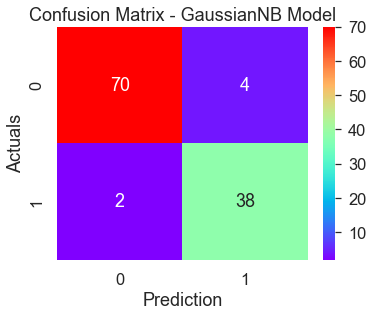

In [58]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Prediction4,y_test), annot=True, cmap='rainbow')
plt.title('Confusion Matrix - GaussianNB Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

<u>Classification Report for GaussianNB Model</u>

In [59]:
print(color.BOLD +'Classification Report for GaussianNB Model:\n\n'
      + color.END, classification_report(Prediction4,y_test))

Classification Report for GaussianNB Model:

               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        74
         1.0       0.90      0.95      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



**<u>Creating 5th Model - KNeighborsClassifier</u>**

In [60]:
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Model5 = KNeighborsClassifier(n_neighbors=5,leaf_size=30, weights='uniform').fit(x_train,y_train)
print(f'Model score of KNeighborsClassifier is:\n')
print(color.BOLD + f'{Model5.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of KNeighborsClassifier is:

94.73%


<u>Predicting results with KNeighborsClassifier Model</u>

In [61]:
Prediction5 = Model5.predict(x_test)

<u>Actual breast cancer when using KNeighborsClassifier Model</u>

In [62]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

<u>Predicted breast cancer when using KNeighborsClassifier Model</u>

In [63]:
Prediction5

array([1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.])

<u>Accuracy score of KNeighborsClassifier Model</u>

In [64]:
print(f'Accuracy score of KNeighborsClassifier Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction5,y_test)*100:.2f}%'+ color.END)

Accuracy score of KNeighborsClassifier Model is:

93.86%


<u>Confusion Matrix for KNeighborsClassifier Model</u>

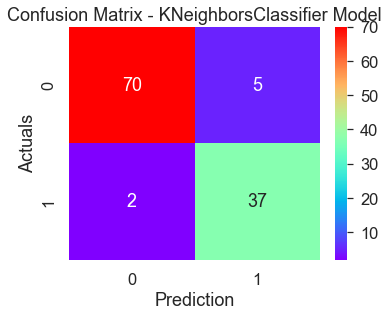

In [65]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Prediction5,y_test), annot=True, cmap='rainbow')
plt.title('Confusion Matrix - KNeighborsClassifier Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

<u>Classification Report for KNeighborsClassifier Model</u>

In [66]:
print(color.BOLD +'Classification Report for KNeighborsClassifier Model:\n\n'
      + color.END, classification_report(Prediction5,y_test))

Classification Report for KNeighborsClassifier Model:

               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        75
         1.0       0.88      0.95      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## Results Comparision

<u>Models score comparision</u>

In [67]:
print(color.BOLD + f'LogisticRegression Model score is: {Model1.score(x_train,y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + color.RED + f'LinearRegression Model score is: {Model2.score(x_train,y_train)*100:.2f}%'
      + color.END,'\n')
print(color.BOLD + color.GREEN + f'RandomForestClassifier Model score is: {Model3.score(x_train,y_train)*100:.2f}%'
      + color.END,'\n')
print(color.BOLD + f'GaussianNB Model score is: {Model4.score(x_train,y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'KNeighborsClassifier Model score is: {Model5.score(x_train,y_train)*100:.2f}%'+ color.END)

LogisticRegression Model score is: 96.26% 

LinearRegression Model score is: 78.04% 

RandomForestClassifier Model score is: 100.00% 

GaussianNB Model score is: 94.07% 

KNeighborsClassifier Model score is: 94.73%


***

#### Observations:
- The **highest model score** to test the Dataframe is for the **RandomForestClassifier Model**
- **LinearRegression Model** is **the worst** out of the five models

***

<u>Models accuracy comparision</u>

In [68]:
print(color.BOLD + f'LogisticRegression Model accuracy is: {accuracy_score(Prediction1,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'LinearRegression Model accuracy is: {accuracy_score(Prediction2,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'RandomForestClassifier Model accuracy is: {accuracy_score(Prediction3,y_test)*100:.2f}%'
      + color.END,'\n')
print(color.BOLD + f'GaussianNB Model accuracy is: {accuracy_score(Prediction4,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'KNeighborsClassifier Model accuracy is: {accuracy_score(Prediction5,y_test)*100:.2f}%'+ color.END)

LogisticRegression Model accuracy is: 94.74% 

LinearRegression Model accuracy is: 94.74% 

RandomForestClassifier Model accuracy is: 94.74% 

GaussianNB Model accuracy is: 94.74% 

KNeighborsClassifier Model accuracy is: 93.86%


***

#### Observation:
Accuracy of all models, except KNeighborsClassifier, falls within **~95%**

***

<u>Confusion matrix comparision</u>

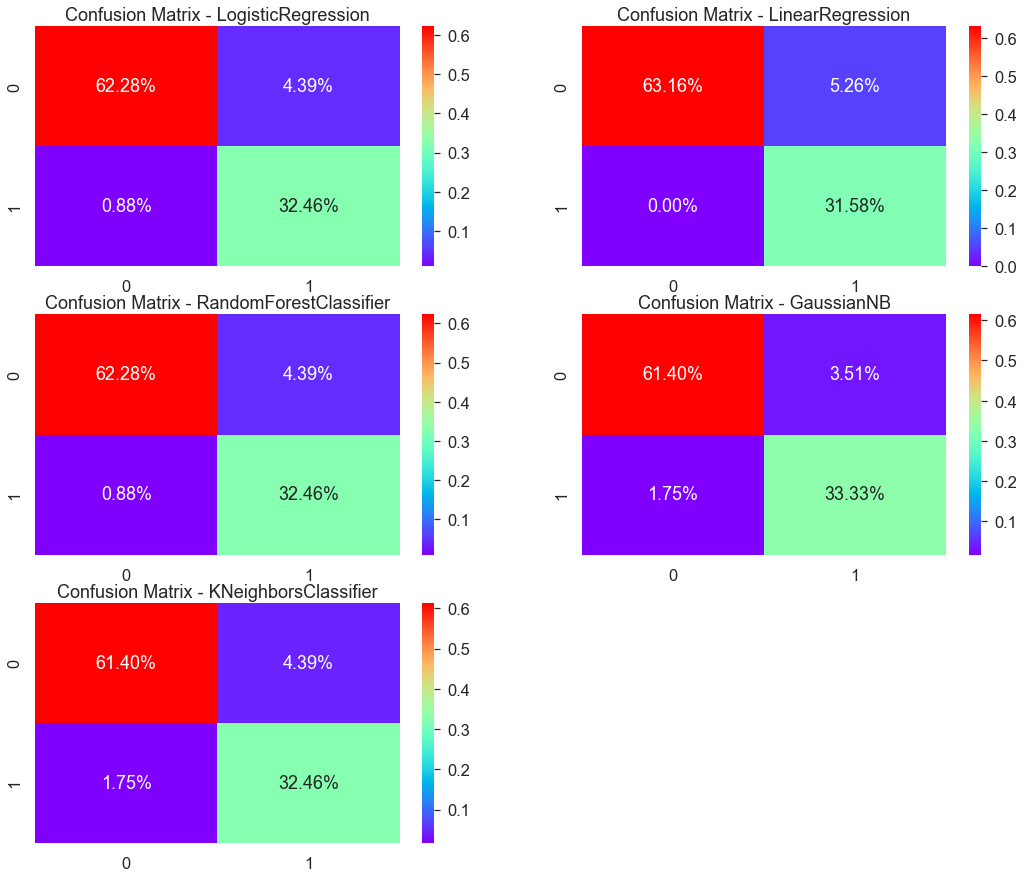

In [69]:
# resource: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# resource: https://matplotlib.org/2.0.2/users/gridspec.html
# resource: https://lifewithdata.com/2022/02/06/confusion-matrix-how-to-plot-and-interpret-confusion-matrix/

plt.style.use('seaborn-white')
plt.figure(figsize=(16, 14))
sns.set(font_scale = 1.5)

plt.subplot2grid((3,2),(0, 0))
ax = sns.heatmap(confusion_matrix(Prediction1,y_test)/
                 np.sum(confusion_matrix(Prediction1,y_test)), annot=True, fmt='.2%', cmap='rainbow')
plt.title('Confusion Matrix - LogisticRegression')

plt.subplot2grid((3,2),(0, 1))
ax = sns.heatmap(confusion_matrix(Prediction2,y_test)/
                 np.sum(confusion_matrix(Prediction2,y_test)), annot=True, fmt='.2%', cmap='rainbow')
plt.title('Confusion Matrix - LinearRegression')

plt.subplot2grid((3,2),(1, 0))
ax = sns.heatmap(confusion_matrix(Prediction3,y_test)/
                 np.sum(confusion_matrix(Prediction3,y_test)), annot=True, fmt='.2%', cmap='rainbow')
plt.title('Confusion Matrix - RandomForestClassifier')

plt.subplot2grid((3,2),(1, 1))
ax = sns.heatmap(confusion_matrix(Prediction4,y_test)/
                 np.sum(confusion_matrix(Prediction4,y_test)), annot=True, fmt='.2%', cmap='rainbow')
plt.title('Confusion Matrix - GaussianNB')

plt.subplot2grid((3,2),(2, 0))
ax = sns.heatmap(confusion_matrix(Prediction5,y_test)/
                 np.sum(confusion_matrix(Prediction5,y_test)), annot=True, fmt='.2%', cmap='rainbow')

plt.title('Confusion Matrix - KNeighborsClassifier')
plt.show()

***

#### Observations:
**1.** <u>True Negative (TN)</u> = top left quadrant - model accurately predicts the negative class 
- true means that in reality the patient is healthy and negative prediction means that the patient is healthy

**2.** <u>False Negative (FN)</u> = bottom left quadrant - model incorrectly predicts the negative class 
- negative means that the patient is healthy but in reality this pateint is sick, so the prediction of negative is incorrect

**3.** <u>False Positive (FP)</u> = top right quadrant - model incorrectly predicts the negative class 
- positive means that the patient is sick when in reality this patient is healthy, so the prediction of positive is incorrect

**4.** <u>True Positive (TP)</u> =  bottom right quadrant - model accurately predicts the positive class
- true means that in reality the patient is sick and positive prediction means that the patient is sick

***

<u>Classification Reports comparision</u>

In [70]:
# resource: https://www.jcchouinard.com/classification-report-in-scikit-learn/
# resource: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/

print(color.BOLD +'LogisticRegression Classification Report:\n\n'+ color.END, classification_report(Prediction1,y_test))
print(color.BOLD +'LinearRegression Classification Report:\n\n'+ color.END, classification_report(Prediction2,y_test))
print(color.BOLD +'RandomForestClassifier Classification Report:\n\n'+ color.END, classification_report(Prediction3,y_test))
print(color.BOLD +'GaussianNB Classification Report:\n\n'+ color.END, classification_report(Prediction4,y_test))
print(color.BOLD +'KNeighborsClassifier Classification Report:\n\n'+ color.END, classification_report(Prediction5,y_test))

LogisticRegression Classification Report:

               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        76
         1.0       0.88      0.97      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

LinearRegression Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.92      0.96        78
           1       0.86      1.00      0.92        36

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114

RandomForestClassifier Classification Report:

               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        76
         1.0       0.88      0.97      0.93        38

    accuracy                           0.95     

***

#### Observations:
**1.** <u>Precision</u>
- The precision is the accuracy of positive breast cancer predictions
- When the number is high, it means that not many 'true' values were predicted as 'false'
- The **<u>highest</u>** precision of positive breast cancer predictions for **Malignant** tumor is when using **RandomForestClassifier** and **LinearRegression (both 100%)** 
- The **<u>highest</u>** precision of positive predictions for **Benign** tumor is when using **GaussianNB Model (90%)** 

**2.** <u>Recall</u>
- The recall is the sensitivity of the fraction of correctly identified positive breast cancer predictions
- When the number is high, it means that most 'true' values were predicted correctly
- The **<u>highest</u>** recall of correctly identified positive breast cancer predictions for **Malignant** tumor is when using **GaussianNB Model (95%)***
- The **<u>highest</u>** recall of correctly identified positive predictions for **Benign** tumor is when using **LinearRegression Model (100%)** 

**3.** <u>F1-score</u>
- The f1-score is the measure of precision and recall at the same time by finding the harmonic mean of the two values
- This number is useful when we get the opposite values when calculating precision and recall
- To get the **<u>highest</u>** f1-score of **97%** for **Malignant** tumor prediction, we can use **RandomForestClassifier Model**
- To get the **<u>highest</u>** f1-score of **94%** for **Benign** tumor prediction, we can use also **RandomForestClassifier Model**

**4.** <u>Support</u>
- The support is the number of occurences of each class in the y-test

**5.** <u>Accuracy</u>
- The accuracy is the measure of the accuracy of all predictions, either positive or negative
- When the number is high, it means that most predictions are accurate
- The accuracy of all models is **high** and is **96%** for **RandomForestClassifier**, **95%** for LogisticRegression, LinearRegression and GaussianNB, and **94%** for KNeighborsClassifier Model

***

## Comparision with external analysis

In [71]:
# rsource: https://www.researchgate.net/publication/337486825_Breast_Cancer_Wisconsin_Diagnostic_Data_Set/link/5ddba538458515dc2f4bcd7e/download

Breast Cancer Wisconsin (Diagnostic) Data Set Report created by Rui Sarmento is analysing Logistic Regression Model.

His overall score is 96.93% and is higher than in the Logistic Regression model above of 94.74%.

This difference can be explained by using different train and test sizes.

In [72]:
# resource: https://www.hindawi.com/journals/abb/2022/6187275/

KNeighborsClassifier Model can be compared to the external experiment analysis called *'Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques'*.

The overall success of *KNeighborsClassifier Model* is higher in the external analysis:
95.95% vs 93.86% of accuracy in the model above

The comparision in the precision in KNeighborsClassifier Model is:
96.6% for Benign vs 88% in the model above
94.8% for Malignant vs 97% in the model above

This means that the precision for non cancerous tumor is higher in the external analysis, where for cancerous tumor is higher in the analysis above.

In [73]:
# resource: https://www.mdpi.com/2076-3417/12/22/11455/pdf

Authors of the article called '*A Linear Discriminant Analysis and Classification Model for
Breast Cancer Diagnosis*' are analysing Random Forest Model.

Their accuracy for the model is 94.7%, the precision 97% and F1 score is 95.5%. 

When compared to the RandomForestClassifier in the above analysis the accuracy is 95.61%, precision is 100% amd F1 score is above 96%.

This comparsion means that test and train in the model from this analysis were better chosen when compared with the external source.

In [74]:
# resource: https://www.sciencedirect.com/science/article/pii/S1877050918309323?ref=pdf_download&fr=RR-2&rr=78a76c7f8ee0d184

Authors of '*Breast Cancer Prediction system*' are *LinearRegression* and *KNeighborsClassifier* in their analysis.

The accuracy of KNeighborsClassifier Model is 97.38 %, which is way higher than the accuracy from the model above.

The accuracy of LinearRegression Model is 89.2% and is way lower than the accuracy from the model above 94.74%.

These differencies can be explained by using different trian and test sizes.

In [75]:
# resource: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7330506/

The authors (Zakia Salod and Yashik Singh) of the article called *'A five-year (2015 to 2019) analysis of studies focused on breast cancer prediction using machine learning: A systematic review and bibliometric analysis'* is reviewing the studies of Wisconsin Breast Cancer Data Set and his findings confirm that the following studies achieved the highest accuracy for Data Set: 
- Abdar and Makarenkov (accuracy = 100%) 
- Elgedawy (accuracy = 99.42 %) 
- Hernández-Julio et al (accuracy = 99.40%)

These findings have way higher accuracy than the best accuracy in the models above, which means that models above should be improved by additional Machine Learning techniques.

## How the Data could be extended?

In [76]:
# resource: https://sdv.dev/SDV/user_guides/single_table/gaussian_copula.html

The Data can be extended by either adding the exact date of collection for testing from patients or by generating syntetic data using differnt syntetic data models, for example:
- GaussianCopula Model
- Tabular Preset
- CTGAN Model
- CompulaGAN Model
- TVAE Model

Steps of the above models:
- Create an instance of the model
- Fit the instance to the data
- Generate syntetic version of the data
- Use model to anonymize PII information
- Specify hyperparameters to improve the output quality

Once the data is extended, it can be tested again to achieve better accuracy than the models above.

## Conclusion

The above is the analysis of Wisconsin Breast Cancer Dataset by using 5 Machine Learning Models in Python. The Model with the highest accuracy is RandomForestClassifier, with other Models of accuracy 1 to 2% below the first one. As the data is imbalanced, the results can be improved by changing the test and train sizes and also by extending the data.

## References

**<u>DataSet download:</u>**
- 'Breast Cancer Wisconsin'(2015) Available at: https://data.world/health/breast-cancer-wisconsin (Accessed: 18 Dec 2022)

**<u>DataSet overview:</u>**
- 'Breast Cancer Wisconsin (Diagnostic) Data Set'(1995) Available at: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 (Accessed: 18 Dec 2022)

**<u>Preparation for analysis and visualisation:</u>**
- Komali (2022) *Pandas Replace substring in DataFrame* Available at: https://sparkbyexamples.com/pandas/pandas-replace-substring-in-dataframe/ (Accessed: 21 Dec 2022)
- 'Tutorials Point' (no date) Available at: https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm (Accessed: 21 Dec 2022)
- Tracyrenee (2022) *Create a pie chart in Python using only one line of code* Available at: https://medium.com/geekculture/create-a-pie-chart-in-python-using-only-one-line-of-code-57bd974d8432 (Accessed: 22 Dec 2022)
- 'Stack overflow' (2022) Available at: https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python (Accessed: 22 Dec 2022)
- 'Python Graph Gallery' (2018) Available at: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps (Accessed: 27 Dec 2022)
- Bibor Szabo (2020) *How to Create a Seaborn Correlation Heatmap in Python?* Available at: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e (Accessed: 27 Dec 2022)
- 'Streamlit' (2023) Available at: https://discuss.streamlit.io/t/change-the-font-size-of-labels-in-sns-heatmap/35454/2 (Accessed: 28 Dec 2022)
- 'Stack overflow' (2016) Available at: https://stackoverflow.com/questions/35420642/how-to-plot-a-graph-for-correlation-co-efficient-between-each-attributes-of-a-da (Accessed: 28 Dec 2022)
- Swagata Das (2022) *BREAST_CANCER_PREDICTION* Available at: https://www.kaggle.com/code/swagata14das/breast-cancer-prediction (Accessed: 29 Dec 2022)

**<u>Machine learning:</u>**
- 'Stack overflow' (2018) Available at: https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe (Accessed: 05 Jan 2022)
- 'Ritchie Ng' (2023) Available at: https://www.ritchieng.com/pandas-changing-datatype/ (Accessed: 05 Jan 2022)
- 'Stack overflow' (2022) Available at: https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python (Accessed: 08 Jan 2022)
- Available at: https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples (Accessed: 05 Jan 2022)
- Avijeet Biswal (no date) *Sklearn Linear Regression* Available at: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model (Accessed: 06 Jan 2022)
- 'Scikit learn' (2022) Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed: 06 Jan 2022)
- 'Stack overflow' (2021) Available at: https://stackoverflow.com/questions/68799909/classification-accuracy-with-sklearn-in-percentage (Accessed: 07 Jan 2022)
- 'Scikit learn' (2022) Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html (Accessed: 07 Jan 2022)
- 'Scikit learn' (2022) Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html (Accessed: 06 Jan 2022)
- James Gallagher (2020) *Python Round: A Step-By-Step Guide* Available at: https://careerkarma.com/blog/python-round/ (Accessed: 06 Jan 2022)
- 'Scikit learn' (2022) Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Accessed: 07 Jan 2022)
- 'Scikit learn' (2022) Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (Accessed: 07 Jan 2022)
- 'Scikit learn' (2022) Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (Accessed: 07 Jan 2022)
- Dennis T (2019) *Confusion Matrix Visualization* Available at: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea (Accessed: 08 Jan 2022)
- 'Matplotlib' (2012) Available at: https://matplotlib.org/2.0.2/users/gridspec.html (Accessed: 08 Jan 2022)
- BPRASAD26 (no date) *Confusion Matrix – How to plot and Interpret Confusion Matrix* Available at: https://lifewithdata.com/2022/02/06/confusion-matrix-how-to-plot-and-interpret-confusion-matrix/ (Accessed: 08 Jan 2022)
- Jean-Christophe Chouinard (2022) *How to use Classification Report in Scikit-learn (Python)* Available at: https://www.jcchouinard.com/classification-report-in-scikit-learn/ (Accessed: 08 Jan 2022)
- J. Palomino, L. Wasser (2020) *Lesson 2. Format Text In Jupyter Notebook With Markdown* Available at: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/ (Accessed: 08 Jan 2022)

**<u>Comparision with external analysis:</u>**
- Rui Sarmento (2019) *Breast Cancer Wisconsin (Diagnostic) Data Set* Available at: https://www.researchgate.net/publication/337486825_Breast_Cancer_Wisconsin_Diagnostic_Data_Set (Accessed: 09 Jan 2022)
- R. Teete, H Al-Aaraj, Y S Y Rubbai, M M Arabyat (2022) *Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques* Available at:  https://www.hindawi.com/journals/abb/2022/6187275/ (Accessed: 09 Jan 2022)
- M. O. Adebiyi, M Olu Arowolo 2, M D Mshelia, O O. Olugbarahttps (2022) *A Linear Discriminant Analysis and Classification Model for Breast Cancer Diagnosis* Available at://www.mdpi.com/2076-3417/12/22/11455/pdf (Accessed: 09 Jan 2022)
- M. Kumari, V. Singh (2018) *Breast Cancer Prediction system* Available at: https://www.sciencedirect.com/science/article/pii/S1877050918309323?ref=pdf_download&fr=RR-2&rr=78a76c7f8ee0d184 (Accessed: 09 Jan 2022)
- z. Salod, Y. Singh (2020) *A five-year (2015 to 2019) analysis of studies focused on breast cancer prediction using machine learning: A systematic review and bibliometric analysis* Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7330506/ (Accessed: 09 Jan 2022)

**<u>How the Data could be extended:</u>** 
- 'SDV'(2018) Available at: https://sdv.dev/SDV/user_guides/single_table/gaussian_copula.html (Accessed: 09 Jan 2022)